<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Contrarian%20Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating and Backtesting simple Momentum/Contrarian Strategies

## Getting the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import datetime as dt
import pandas as pd
%pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
start = dt.datetime.today()-dt.timedelta(7)
end = dt.datetime.today()
data = pd.DataFrame()
interval = "90m"
ticker = 'AMZN'
df= yf.download(ticker,start,end, interval = '1m')
data[ticker]= df[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,AMZN
Datetime,
2022-01-26 09:30:00-05:00,2899.760010
2022-01-26 09:31:00-05:00,2874.199951
2022-01-26 09:32:00-05:00,2875.699951
2022-01-26 09:33:00-05:00,2866.790039
2022-01-26 09:34:00-05:00,2868.169922
...,...
2022-02-01 15:56:00-05:00,3030.270020
2022-02-01 15:57:00-05:00,3028.989990
2022-02-01 15:58:00-05:00,3026.350098


In [ ]:
data.head(10)

,AMZN
Datetime,
2022-01-26 09:30:00-05:00,2899.760010
2022-01-26 09:31:00-05:00,2874.199951
2022-01-26 09:32:00-05:00,2875.699951
2022-01-26 09:33:00-05:00,2866.790039
2022-01-26 09:34:00-05:00,2868.169922
2022-01-26 09:35:00-05:00,2855.497070
2022-01-26 09:36:00-05:00,2857.010010
2022-01-26 09:37:00-05:00,2860.360107
2022-01-26 09:38:00-05:00,2855.030029


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1943 entries, 2022-01-26 09:30:00-05:00 to 2022-02-01 16:00:00-05:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1943 non-null   float64
dtypes: float64(1)
memory usage: 30.4 KB


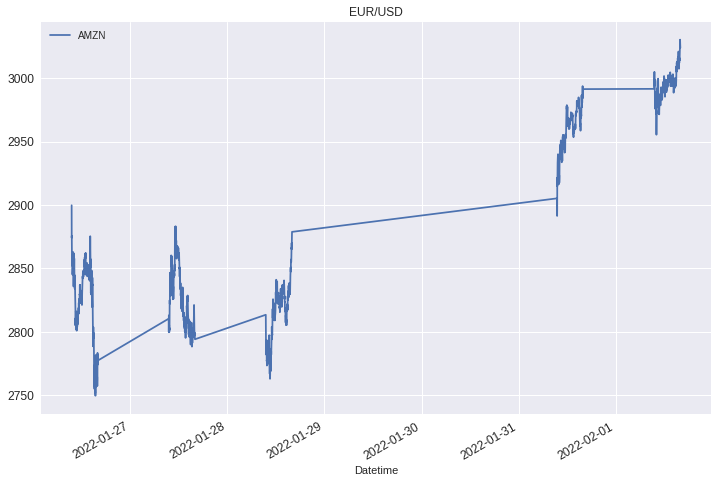

In [ ]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

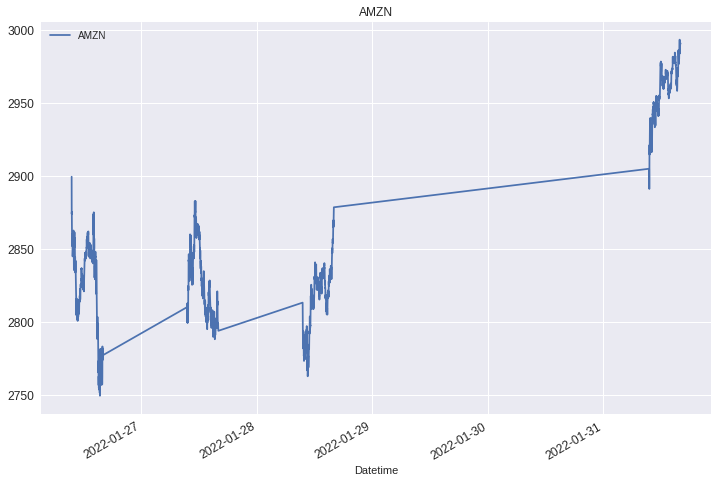

In [ ]:
data.loc["2022-01"].plot(figsize = (12, 8), title = ticker, fontsize = 12)
plt.show()

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

,AMZN,returns
Datetime,,
2022-01-26 09:31:00-05:00,2874.199951,-0.008854
2022-01-26 09:32:00-05:00,2875.699951,0.000522
2022-01-26 09:33:00-05:00,2866.790039,-0.003103
2022-01-26 09:34:00-05:00,2868.169922,0.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428
...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101
2022-02-01 15:57:00-05:00,3028.989990,-0.000423
2022-02-01 15:58:00-05:00,3026.350098,-0.000872


## Defining a simple Contrarian Strategy (window = 3)

In [ ]:
window = 3

In [ ]:
data

,AMZN,returns
Datetime,,
2022-01-26 09:31:00-05:00,2874.199951,-0.008854
2022-01-26 09:32:00-05:00,2875.699951,0.000522
2022-01-26 09:33:00-05:00,2866.790039,-0.003103
2022-01-26 09:34:00-05:00,2868.169922,0.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428
...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101
2022-02-01 15:57:00-05:00,3028.989990,-0.000423
2022-02-01 15:58:00-05:00,3026.350098,-0.000872


In [ ]:
data["returns"].rolling(window).mean()

Datetime
2022-01-26 09:31:00-05:00         NaN
2022-01-26 09:32:00-05:00         NaN
2022-01-26 09:33:00-05:00   -0.003812
2022-01-26 09:34:00-05:00   -0.000700
2022-01-26 09:35:00-05:00   -0.002350
                               ...   
2022-02-01 15:56:00-05:00    0.000801
2022-02-01 15:57:00-05:00    0.000107
2022-02-01 15:58:00-05:00   -0.000398
2022-02-01 15:59:00-05:00   -0.000705
2022-02-01 16:00:00-05:00   -0.000564
Name: returns, Length: 1942, dtype: float64

In [ ]:
data["position"] = -np.sign(data["returns"].rolling(window).mean()) # contrarian (minus sign)

In [ ]:
data

,AMZN,returns,position
Datetime,,,
2022-01-26 09:31:00-05:00,2874.199951,-0.008854,NaN
2022-01-26 09:32:00-05:00,2875.699951,0.000522,NaN
2022-01-26 09:33:00-05:00,2866.790039,-0.003103,1.0
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0
...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0


## Vectorized Strategy Backtesting

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

,AMZN,returns,position,strategy
Datetime,,,,
2022-01-26 09:31:00-05:00,2874.199951,-0.008854,NaN,NaN
2022-01-26 09:32:00-05:00,2875.699951,0.000522,NaN,NaN
2022-01-26 09:33:00-05:00,2866.790039,-0.003103,1.0,NaN
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,-0.004428
...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872


In [ ]:
data.dropna(inplace = True)

In [ ]:
data

,AMZN,returns,position,strategy
Datetime,,,,
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,-0.004428
2022-01-26 09:36:00-05:00,2857.010010,0.000530,1.0,0.000530
2022-01-26 09:37:00-05:00,2860.360107,0.001172,1.0,0.001172
2022-01-26 09:38:00-05:00,2855.030029,-0.001865,1.0,-0.001865
...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872


In [ ]:
data[["returns", "strategy"]].sum()

returns     0.053345
strategy    0.038709
dtype: float64

In [ ]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     1.054793
strategy    1.039468
dtype: float64

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data

,AMZN,returns,position,strategy,creturns,cstrategy
Datetime,,,,,,
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481,1.000481,1.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,-0.004428,0.996061,0.996061
2022-01-26 09:36:00-05:00,2857.010010,0.000530,1.0,0.000530,0.996589,0.996589
2022-01-26 09:37:00-05:00,2860.360107,0.001172,1.0,0.001172,0.997757,0.997757
2022-01-26 09:38:00-05:00,2855.030029,-0.001865,1.0,-0.001865,0.995898,0.995898
...,...,...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101,1.057025,1.038974
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423,1.056579,1.039413
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872,1.055658,1.040320


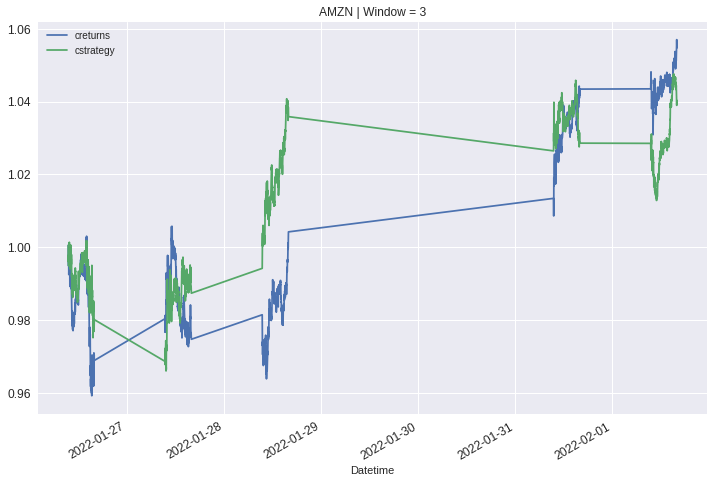

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8),
                                     title = "AMZN | Window = {}".format(window), fontsize = 12)
plt.show()

## Changing the window parameter

In [ ]:
start = dt.datetime.today()-dt.timedelta(7)
end = dt.datetime.today()
data = pd.DataFrame()
interval = "90m"
ticker = 'AMZN'
df= yf.download(ticker,start,end, interval = '1m')
data[ticker]= df[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,AMZN
Datetime,
2022-01-26 09:30:00-05:00,2899.760010
2022-01-26 09:31:00-05:00,2874.199951
2022-01-26 09:32:00-05:00,2875.699951
2022-01-26 09:33:00-05:00,2866.790039
2022-01-26 09:34:00-05:00,2868.169922
...,...
2022-02-01 15:56:00-05:00,3030.270020
2022-02-01 15:57:00-05:00,3028.989990
2022-02-01 15:58:00-05:00,3026.350098


In [ ]:
data

,AMZN
Datetime,
2022-01-26 09:30:00-05:00,2899.760010
2022-01-26 09:31:00-05:00,2874.199951
2022-01-26 09:32:00-05:00,2875.699951
2022-01-26 09:33:00-05:00,2866.790039
2022-01-26 09:34:00-05:00,2868.169922
...,...
2022-02-01 15:56:00-05:00,3030.270020
2022-02-01 15:57:00-05:00,3028.989990
2022-02-01 15:58:00-05:00,3026.350098


In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data.dropna(inplace = True)
data

,AMZN,returns
Datetime,,
2022-01-26 09:31:00-05:00,2874.199951,-0.008854
2022-01-26 09:32:00-05:00,2875.699951,0.000522
2022-01-26 09:33:00-05:00,2866.790039,-0.003103
2022-01-26 09:34:00-05:00,2868.169922,0.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428
...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101
2022-02-01 15:57:00-05:00,3028.989990,-0.000423
2022-02-01 15:58:00-05:00,3026.350098,-0.000872


In [ ]:
to_plot = ["returns"]

In [ ]:
for w in [1, 2, 3, 5, 10]:
    data["position{}".format(w)] = -np.sign(data["returns"].rolling(w).mean())
    data["strategy{}".format(w)] = data["position{}".format(w)].shift(1) * data["returns"]
    to_plot.append("strategy{}".format(w))

In [ ]:
data

,AMZN,returns,position1,strategy1,position2,strategy2,position3,strategy3,position5,strategy5,position10,strategy10
Datetime,,,,,,,,,,,,
2022-01-26 09:31:00-05:00,2874.199951,-0.008854,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-26 09:32:00-05:00,2875.699951,0.000522,-1.0,0.000522,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-26 09:33:00-05:00,2866.790039,-0.003103,1.0,0.003103,1.0,-0.003103,1.0,NaN,NaN,NaN,NaN,NaN
2022-01-26 09:34:00-05:00,2868.169922,0.000481,-1.0,0.000481,1.0,0.000481,1.0,0.000481,NaN,NaN,NaN,NaN
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,0.004428,1.0,-0.004428,1.0,-0.004428,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101,-1.0,-0.000101,-1.0,-0.000101,-1.0,-0.000101,-1.0,-0.000101
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,1.0,0.000423,1.0,0.000423,-1.0,0.000423,-1.0,0.000423,-1.0,0.000423
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,-0.000872,1.0,-0.000872,1.0,0.000872,-1.0,0.000872,-1.0,0.000872


In [ ]:
to_plot

['returns', 'strategy1', 'strategy2', 'strategy3', 'strategy5', 'strategy10']

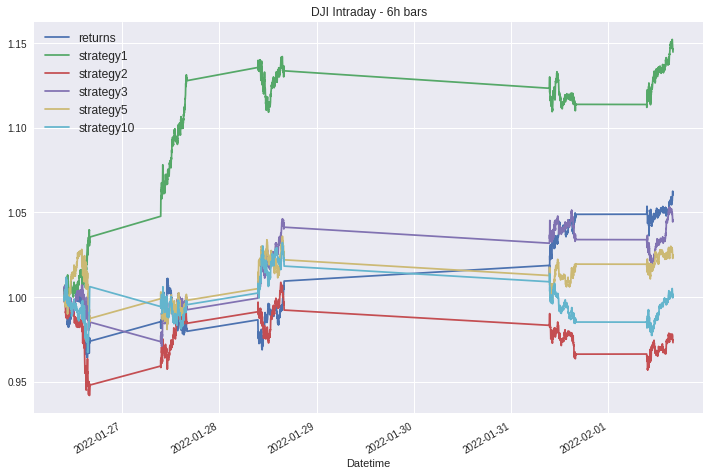

In [ ]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.title("DJI Intraday - 6h bars", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data

,AMZN,returns,position1,strategy1,position2,strategy2,position3,strategy3,position5,strategy5,position10,strategy10
Datetime,,,,,,,,,,,,
2022-01-26 09:31:00-05:00,2874.199951,-0.008854,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-26 09:32:00-05:00,2875.699951,0.000522,-1.0,0.000522,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-26 09:33:00-05:00,2866.790039,-0.003103,1.0,0.003103,1.0,-0.003103,1.0,NaN,NaN,NaN,NaN,NaN
2022-01-26 09:34:00-05:00,2868.169922,0.000481,-1.0,0.000481,1.0,0.000481,1.0,0.000481,NaN,NaN,NaN,NaN
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,0.004428,1.0,-0.004428,1.0,-0.004428,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101,-1.0,-0.000101,-1.0,-0.000101,-1.0,-0.000101,-1.0,-0.000101
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,1.0,0.000423,1.0,0.000423,-1.0,0.000423,-1.0,0.000423,-1.0,0.000423
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,-0.000872,1.0,-0.000872,1.0,0.000872,-1.0,0.000872,-1.0,0.000872


## Trades and Trading Costs (Part 1)

In [ ]:
start = dt.datetime.today()-dt.timedelta(7)
end = dt.datetime.today()
data = pd.DataFrame()
ticker = 'AMZN'
df= yf.download(ticker,start,end, interval = '1m')
data[ticker]= df[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,AMZN
Datetime,
2022-01-26 09:30:00-05:00,2899.760010
2022-01-26 09:31:00-05:00,2874.199951
2022-01-26 09:32:00-05:00,2875.699951
2022-01-26 09:33:00-05:00,2866.790039
2022-01-26 09:34:00-05:00,2868.169922
...,...
2022-02-01 15:56:00-05:00,3030.270020
2022-02-01 15:57:00-05:00,3028.989990
2022-02-01 15:58:00-05:00,3026.350098


In [ ]:
window = 3

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data["position"] = -np.sign(data["returns"].rolling(window).mean())

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

,AMZN,returns,position,strategy
Datetime,,,,
2022-01-26 09:30:00-05:00,2899.760010,NaN,NaN,NaN
2022-01-26 09:31:00-05:00,2874.199951,-0.008854,NaN,NaN
2022-01-26 09:32:00-05:00,2875.699951,0.000522,NaN,NaN
2022-01-26 09:33:00-05:00,2866.790039,-0.003103,1.0,NaN
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481
...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872


In [ ]:
data.dropna(inplace = True)

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data

,AMZN,returns,position,strategy,creturns,cstrategy
Datetime,,,,,,
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481,1.000481,1.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,-0.004428,0.996061,0.996061
2022-01-26 09:36:00-05:00,2857.010010,0.000530,1.0,0.000530,0.996589,0.996589
2022-01-26 09:37:00-05:00,2860.360107,0.001172,1.0,0.001172,0.997757,0.997757
2022-01-26 09:38:00-05:00,2855.030029,-0.001865,1.0,-0.001865,0.995898,0.995898
...,...,...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101,1.057025,1.038974
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423,1.056579,1.039413
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872,1.055658,1.040320


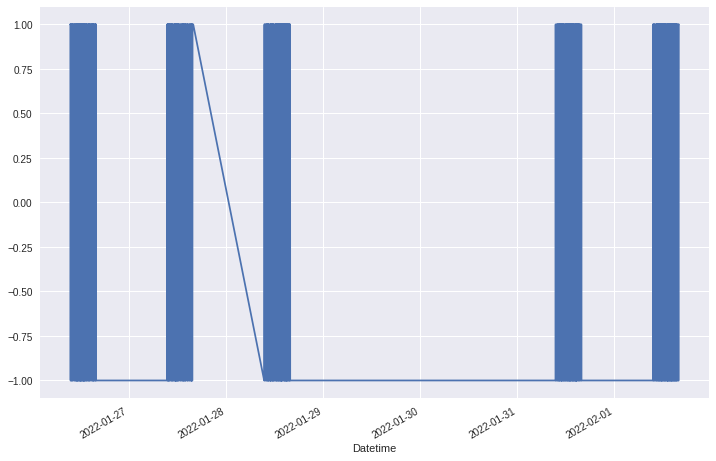

In [ ]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

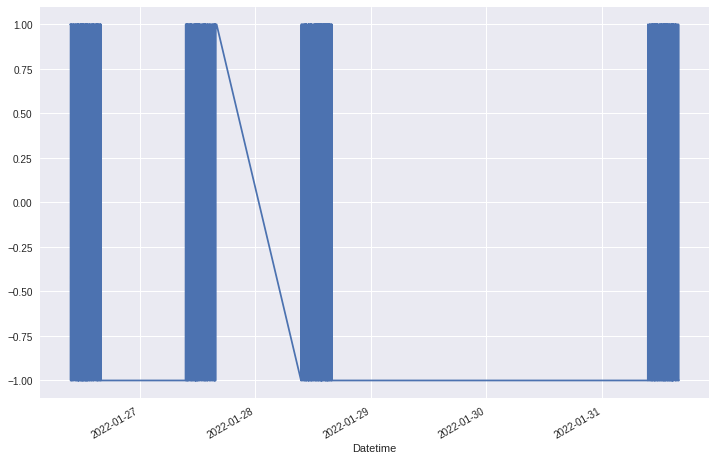

In [ ]:
data.loc["2022-01", "position"].plot(figsize = (12 , 8))
plt.show()

__Trading/Transaction Costs__ (simplified)

In [ ]:
spread = 1.5 * 0.0001 # pips == fourth price decimal
spread

0.00015000000000000001

In [ ]:
half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread

7.500000000000001e-05

In [ ]:
ptc = half_spread / data.AMZN.mean() # proportional tc per trade (position change +-1)
ptc

2.6000184435630673e-08

In [ ]:
ptc = 0.00007

In [ ]:
data

,AMZN,returns,position,strategy,creturns,cstrategy
Datetime,,,,,,
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481,1.000481,1.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,-0.004428,0.996061,0.996061
2022-01-26 09:36:00-05:00,2857.010010,0.000530,1.0,0.000530,0.996589,0.996589
2022-01-26 09:37:00-05:00,2860.360107,0.001172,1.0,0.001172,0.997757,0.997757
2022-01-26 09:38:00-05:00,2855.030029,-0.001865,1.0,-0.001865,0.995898,0.995898
...,...,...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101,1.057025,1.038974
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423,1.056579,1.039413
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872,1.055658,1.040320


In [ ]:
data.position.diff().fillna(0).abs()

Datetime
2022-01-26 09:34:00-05:00    0.0
2022-01-26 09:35:00-05:00    0.0
2022-01-26 09:36:00-05:00    0.0
2022-01-26 09:37:00-05:00    0.0
2022-01-26 09:38:00-05:00    0.0
                            ... 
2022-02-01 15:56:00-05:00    0.0
2022-02-01 15:57:00-05:00    0.0
2022-02-01 15:58:00-05:00    2.0
2022-02-01 15:59:00-05:00    0.0
2022-02-01 16:00:00-05:00    0.0
Name: position, Length: 1939, dtype: float64

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data

,AMZN,returns,position,strategy,creturns,cstrategy,trades
Datetime,,,,,,,
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481,1.000481,1.000481,0.0
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,-0.004428,0.996061,0.996061,0.0
2022-01-26 09:36:00-05:00,2857.010010,0.000530,1.0,0.000530,0.996589,0.996589,0.0
2022-01-26 09:37:00-05:00,2860.360107,0.001172,1.0,0.001172,0.997757,0.997757,0.0
2022-01-26 09:38:00-05:00,2855.030029,-0.001865,1.0,-0.001865,0.995898,0.995898,0.0
...,...,...,...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101,1.057025,1.038974,0.0
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423,1.056579,1.039413,0.0
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872,1.055658,1.040320,2.0


In [ ]:
data.trades.value_counts()

0.0    1379
2.0     560
Name: trades, dtype: int64

## Trades and Trading Costs (Part 2)

In [ ]:
data

,AMZN,returns,position,strategy,creturns,cstrategy,trades
Datetime,,,,,,,
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481,1.000481,1.000481,0.0
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,-0.004428,0.996061,0.996061,0.0
2022-01-26 09:36:00-05:00,2857.010010,0.000530,1.0,0.000530,0.996589,0.996589,0.0
2022-01-26 09:37:00-05:00,2860.360107,0.001172,1.0,0.001172,0.997757,0.997757,0.0
2022-01-26 09:38:00-05:00,2855.030029,-0.001865,1.0,-0.001865,0.995898,0.995898,0.0
...,...,...,...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101,1.057025,1.038974,0.0
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423,1.056579,1.039413,0.0
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872,1.055658,1.040320,2.0


In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [ ]:
data

,AMZN,returns,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
Datetime,,,,,,,,,
2022-01-26 09:34:00-05:00,2868.169922,0.000481,1.0,0.000481,1.000481,1.000481,0.0,0.000481,1.000481
2022-01-26 09:35:00-05:00,2855.497070,-0.004428,1.0,-0.004428,0.996061,0.996061,0.0,-0.004428,0.996061
2022-01-26 09:36:00-05:00,2857.010010,0.000530,1.0,0.000530,0.996589,0.996589,0.0,0.000530,0.996589
2022-01-26 09:37:00-05:00,2860.360107,0.001172,1.0,0.001172,0.997757,0.997757,0.0,0.001172,0.997757
2022-01-26 09:38:00-05:00,2855.030029,-0.001865,1.0,-0.001865,0.995898,0.995898,0.0,-0.001865,0.995898
...,...,...,...,...,...,...,...,...,...
2022-02-01 15:56:00-05:00,3030.270020,0.000101,-1.0,-0.000101,1.057025,1.038974,0.0,-0.000101,0.960764
2022-02-01 15:57:00-05:00,3028.989990,-0.000423,-1.0,0.000423,1.056579,1.039413,0.0,0.000423,0.961170
2022-02-01 15:58:00-05:00,3026.350098,-0.000872,1.0,0.000872,1.055658,1.040320,2.0,0.000732,0.961874


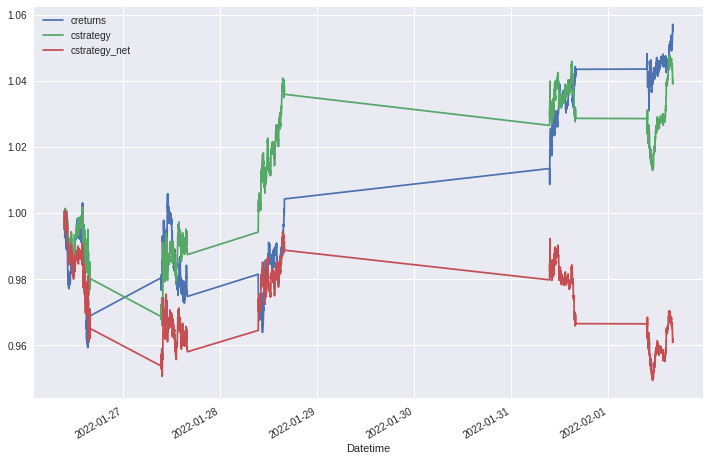

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()